# Simulating Netflix Equity Price and Returns 

## Table of Contents
1. Introduction
2. Install and Import Packages
3. Access Data using IEX API Call
4. Pre-processing
5. Exploratory Data Analysis 
6. Random Price Walk Using a Normal Distribution
7. Simulate NFLX Equity Price and Returns

## 1. Introduction 

In the coming weeks, we'll focus on some super-fun time-series data, including accessing and working with time-indexed data and building analyses, models, and visualizations. 

Before that, let's run a quick, simple simulation on Netflix stock (ticker: NFLX). A lot can be gleaned from assessing underlying fundamentals and growth / momentum to value a company in the medium and long term. However, day-to-day stock price movements are notoriously difficult to predict, adopting the path of a random walk. Would could also simulate a random walk to approximate genetic drift, an animal foraging, electron transport through a metal, bacterial movement, firing neurons, and particle diffusion through a liquid or gas.

Today, we'll simulate NFLX price and returns using historical closing price data to approximate NFLX day-to-day movement. Here, we'll use the IEX API (https://iexcloud.io/), which is an excellent source of financial data. You can sign up for a free individual account, though there are tiered priced individual and business offerings with increasingly high API call allowances. In a future post, we'll work with the Yahoo Finance API (free).  

## 2. Install and Import Packages 

In [1]:
!pip install iexfinance

     |████████████████████████████████| 51kB 6.8MB/s  eta 0:00:01


In [2]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from datetime import datetime, date
from numpy.random import normal, seed
from numpy.random import choice 
from scipy.stats import norm

from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data

## 3. Access Data using IEX API Call 

In [3]:
# The code was removed by Watson Studio for sharing.

We'll use historical data for 3 years starting August 18, 2017 to August 17, 2020. 

In [4]:
# Define function to get historical prices using IEX API call. Set the output_format = 'pandas' to automatically create dataframe. 

start = datetime(2017, 8, 18)
end = datetime(2020, 8, 17)

def getHistoricalPrices(stock):
    return get_historical_data(stock, start, end, output_format='pandas', token=API_TOKEN)

In [5]:
# Call function for Netflix, ticker symbol 'NFLX' 
NFLX = getHistoricalPrices('NFLX')

## 4. Pre-processing

In [6]:
# Check first 3 and last 3 rows of dataframe
pd.concat([NFLX.head(3), NFLX.tail(3)])

,open,high,low,close,volume
date,,,,,
2017-08-18,165.95,169.97,165.80,166.54,7385736
2017-08-21,166.91,168.99,164.23,166.76,6480708
2017-08-22,167.76,169.93,167.04,169.34,4886326
2020-08-13,478.40,484.45,476.45,481.33,3008933
2020-08-14,482.82,488.33,480.21,482.68,2943487
2020-08-17,484.19,486.24,479.10,482.35,2423545


Checking the dataframe's info below, we see the dataframe has 755 observations (trading days) and no null values. 

In [7]:
# Check dataframe info
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2017-08-18 to 2020-08-17
Data columns (total 5 columns):
open      754 non-null float64
high      754 non-null float64
low       754 non-null float64
close     754 non-null float64
volume    754 non-null int64
dtypes: float64(4), int64(1)
memory usage: 35.3 KB


In [8]:
# Check shape of dataframe
NFLX.shape

(754, 5)

In [9]:
# Check data types
NFLX.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

## 5. Exploratory Data Analysis

For the purposes of this exercise, let's do a quick, cursory exploration, though in coming weeks we will be performing more in-depth time-series data explorations. 

Let's focus on the close price. Looking at the statistical summary below, we see that over the 3-year period, the mean price is 326 dollars per share, the minimum is 166 dollars per share, and the maximum is 549 dollars per share. 

In [10]:
# Statistical summary of dataframe
NFLX.describe()

,open,high,low,close,volume
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,325.560477,330.827706,320.092414,325.721034,8.904339e+06
std,76.475412,77.747937,75.018415,76.450998,5.178620e+06
min,165.000000,168.670000,164.230000,165.950000,2.019322e+06
25%,284.930000,290.832500,278.755000,285.980000,5.457225e+06
50%,332.920000,336.790000,327.755000,332.885000,7.376614e+06
75%,367.115000,371.480000,361.397500,366.960000,1.090134e+07
max,567.980000,575.370000,520.960000,548.730000,5.841036e+07


In [11]:
# Set seaborn plot style
sns.set_style("dark")

# Set matplotlib plot style
style.use("ggplot")

Visualizing the close price spread with a box plot, we see a median of roughly 330 dollars per share and outliers on the higher end above 480 dollar per share. 

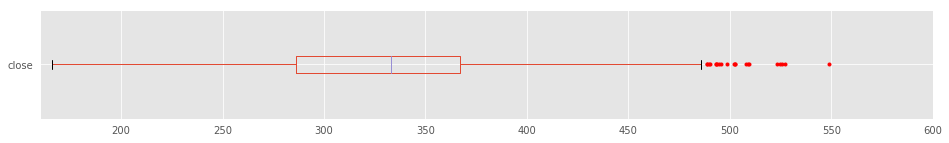

In [12]:
# Box plot of price per night
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
NFLX['close'].plot(kind='box', xlim=(160, 600), vert=False, flierprops=red_square, figsize=(16,2))

The close price distribution is roughly bimodal with centers around 200 and 330 dollars per share.

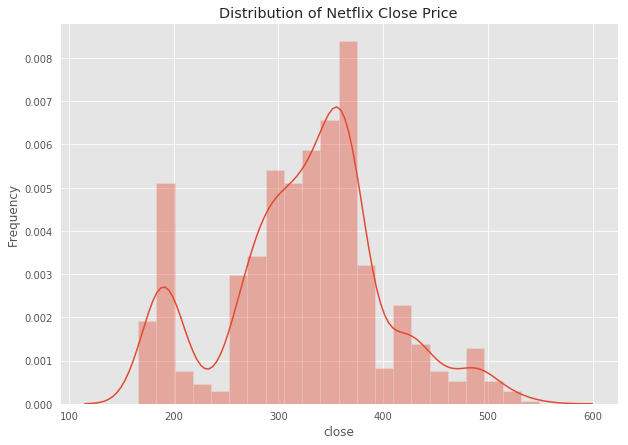

In [13]:
# Plot NFLX close price distribution
plt.figure(figsize=(10,7))
sns.distplot(NFLX.close)
plt.ylabel("Frequency")
plt.title("Distribution of Netflix Close Price")
plt.show()

## 6. Random Price Walk Using a Normal Distribution

Let's set a random price walk based on a normal distribution. In our random walk below, a 1,000 dollar per share start price increases to over 2,500 dollars per share over the course of 750 steps (similar to the number of trading days in our NFLX data set). 

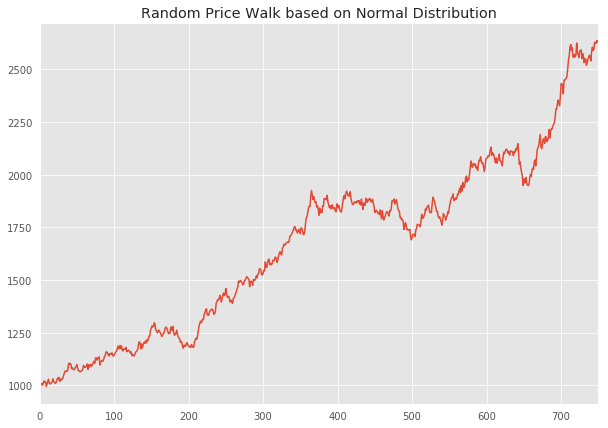

In [14]:
# Set a random seed for reproducibility
seed(1234)

# Instantiate random walk based on normal distribution with center of 0.001, scaled to 0.01, and 750 steps
random_walk = normal(loc=0.001, scale=0.01, size=750)

# Convert to series
random_walk = pd.Series(random_walk)

# Create random prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices, multiply by 1000 to show what happens to 1000 dollar per share starting price 
random_prices.mul(1000).plot(figsize = (10,7), title = 'Random Price Walk based on Normal Distribution')
plt.show()

## 7. Simulate NFLX Equity Price and Returns

Simulating NFLX daily returns based on historical data, we see that the simulated returns (red) centered at around 0% return day-to-day and are fairly close to a normal distribution (black), with a slightly tighter center and more outliers. 

In [21]:
NFLX_returns.head()

date
2017-08-21    0.001321
2017-08-22    0.015471
2017-08-23   -0.001653
2017-08-24   -0.005501
2017-08-25   -0.012966
Name: close, dtype: float64

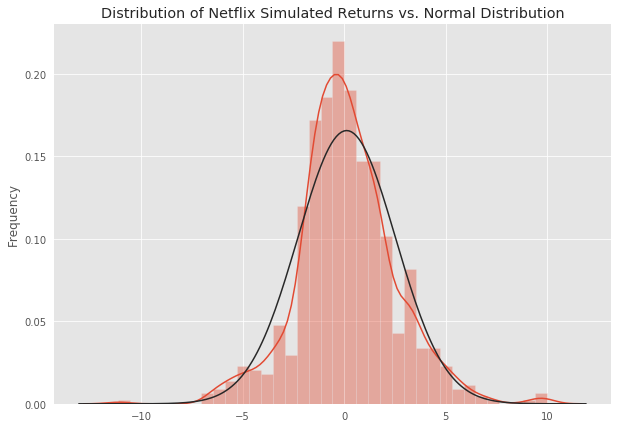

In [15]:
# Set a random seed for reproducibility
seed(1234)

# Calculate NFLX daily returns based on close price using pct_change, remember to use dropna as the first pct change will have a null value
NFLX_returns = NFLX['close'].pct_change().dropna()

# Get n observations
n_obs = NFLX_returns.count()

# Create random walk for NFLX closing price
NFLX_random_walk = choice(NFLX_returns, size=n_obs)

# Convert to series, make sure to set index as the original index of NFLX_returns (date)
NFLX_random_walk = pd.Series(NFLX_random_walk, index=NFLX_returns.index)

# Plot NFLX returns distribution (mutliply by 100 for 100 percent) and compare to normal distribution
plt.figure(figsize=(10,7))
sns.distplot(NFLX_random_walk.mul(100), fit=norm)
plt.ylabel("Frequency")
plt.title("Distribution of Netflix Simulated Returns vs. Normal Distribution")
plt.show()

Let's plot the simulating NFLX closing prices over 3 years based on historical prices and returns and comparing to NFLX historical prices. We see that our simulation underperforms historical prices toward the beginning and end of the 3-year period. 

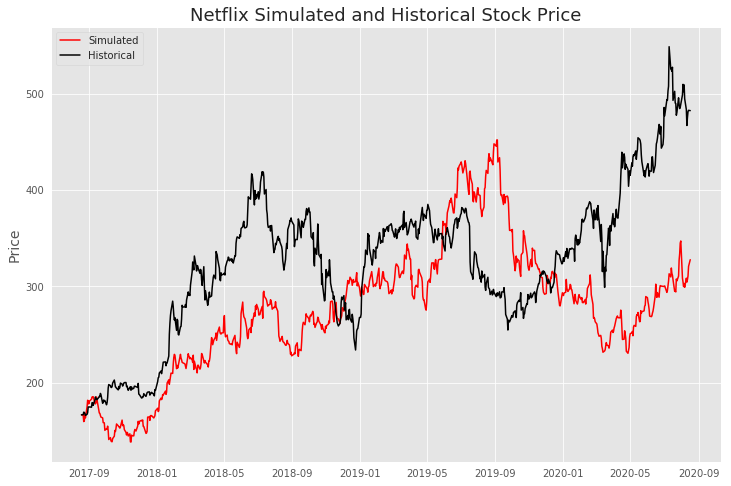

In [16]:
# NFLX start price, using the 'D' business day offset
start = NFLX.close.first('D')

# Add 1 to random walk and append to start
NFLX_random_walk = NFLX_random_walk.add(1)
NFLX_random_price = start.append(NFLX_random_walk)

# Calculate cumulative product of return on price
NFLX_random_price = NFLX_random_price.cumprod()
NFLX['simulated'] = NFLX_random_price

plt.figure(figsize=(12,8))
sns.lineplot(data=NFLX.simulated, color='red')
sns.lineplot(data=NFLX.close, color='black')
plt.ylabel("Price", fontsize=14)
plt.title("Netflix Simulated and Historical Stock Price", fontsize=18)
plt.legend(labels=["Simulated","Historical"])